# **Final Exam for Deep Network Development course. First part (mandatory)**

## Your information
Please fill the next cell with your information

**Full Name**:

**Neptun code:**

**Date:** 16/01/2024 10AM-11AM

## Task Description

#### Your task is to implement a custom architecture inspired by **LSTM**, and the **forward function**. The model receives an **image** as input and generates a **caption** of the image.

#### Afterwards, make sure to run cell **3. Testing your implementation** to check if your implementation is correct.

#### This task should be **SOLVED IN 1 HOUR** and submitted to Canvas (download the .ipynb file). Please note that after 1 hour, the Canvas exam assignment will be closed and you cannot submit your solution.

## Basic Imports

All packages necessarry are already imported for you.

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import requests
import math
import matplotlib.pyplot as plt
from torch import nn
from torchvision import models
from torchsummary import summary
from torchvision import transforms
import io
from io import BytesIO
from PIL import Image
from urllib.request import urlopen
import torch.nn.functional as F

#### **NO GPU IS NEEDED for this task**. No training nor any computationally expensive operation will be performed. This notebook runs on any computer using a cpu.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## 1. Architecture Description and Visualization

#### Please keep in mind that this architecture is purely imagined and should not correspond to any existing model You will not find it on the internet.

Please right click the image and "Open image in a new tab" to view it better with zoom. Or download it from here: https://drive.google.com/file/d/1JQcofDuOAMkARUE4JRm43kBtu-AINun9/view?usp=drive_link

<br>
<br>

![](https://drive.google.com/uc?id=1JQcofDuOAMkARUE4JRm43kBtu-AINun9)


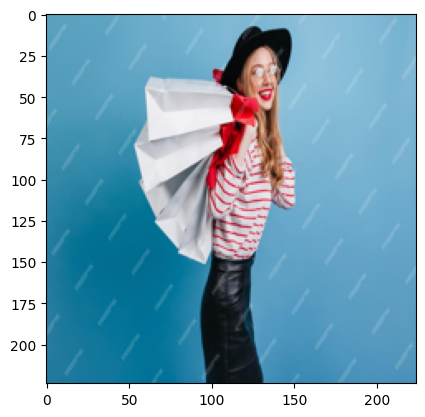

In [ ]:
response = requests.get("https://img.freepik.com/free-photo/merry-girl-leather-skirt-holding-shopping-bags-studio-shot-appealing-blonde-woman-hat-isolated-blue-background_197531-27310.jpg?w=1380&t=st=1705141783~exp=1705142383~hmac=0476c52ec144d19e7e6c11a22c00bd48300607f9b4b9b154ca7c6d7f6184a3b1")
image = Image.open(BytesIO(response.content)).convert('RGB')
image = image.resize((224, 224))
plt.imshow(image)

In [ ]:
# Load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    image = preprocess(image)
    image = image.unsqueeze(0)  # Add batch dimension
    return image

input_image = load_image(BytesIO(response.content))
print(input_image.size())

torch.Size([1, 3, 224, 224])


### Create vocabulary

In [ ]:
vocabulary = ['a','girl','shopping','bag','woman','happy','white','glasses','red','with']

# Create a mapping from word to index
word_to_idx = {i: word for i, word in enumerate(vocabulary)}
print(word_to_idx)

{0: 'a', 1: 'girl', 2: 'shopping', 3: 'bag', 4: 'woman', 5: 'happy', 6: 'white', 7: 'glasses', 8: 'red', 9: 'with'}


### 2. Implementing the architecture.

**MODIFY THIS CELL ONLY**

In [ ]:
Q = torch.tensor([[ 0.1,  0.2,  0.3],
                  [ 0.4,  0.5,  0.6],
                  [ 0.7,  0.8,  0.9]])

K = torch.tensor([[ 0.2,  0.3,  0.4],
                  [ 0.5,  0.6,  0.7],
                  [ 0.8,  0.9,  1.0]])

#use random values
#V = ???


In [ ]:
class ImageEncoder(nn.Module):
    def __init__(self):
        super(ImageEncoder, self).__init__()

        # Define convolutional layers



    def forward(self, x):




        # Apply key, value, and query weights


        # Combine key, value, and query


        return out

class TextDecoder(nn.Module):
    def __init__(self):
        super(TextDecoder, self).__init__()




    def forward(self, x):



        return out

# Combine the encoder and decoder
class ImageToTextModel(nn.Module):
    def __init__(self, image_encoder, text_decoder):
        super(ImageToTextModel, self).__init__()



    def forward(self, x):



        # Reshape the output of the encoder to fit the input of the decoder


        #reshape the final output to [1,9,10]

        return out


In [ ]:
image_encoder = ImageEncoder()
text_decoder = TextDecoder()
image_to_text_model = ImageToTextModel(image_encoder, text_decoder)


output = image_to_text_model(input_image)

### 3. Testing your implementation

Expected output size:

**torch.Size([ 1, 9, 10])**

In [ ]:
match = np.array(output.size()) == [1,9,10]
if np.all(match):
    print('Size is matched:', output.size())
else:
    raise TypeError("Size is not matched")


### 4. Solution

Visualizing your results. **DO NOT MODIFY THIS CODE**

In [ ]:
# Display the image
plt.imshow(np.transpose(input_image.squeeze().numpy(), (1, 2, 0)))
plt.axis("off")
plt.show()

# Get the predicted indices for each word in the vocabulary
predicted_indices = torch.argmax(output, dim = -1)
# Convert indices to words using the vocabulary
predicted_words = [word_to_idx[int(idx)] for idx in predicted_indices[0]]

# Combine words into a caption
caption = ' '.join(predicted_words)

print("Generated Caption:", caption)